In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plot
import numpy as np
%matplotlib inline

target_url = ("http://archive.ics.uci.edu/ml/machine-"
              "learning-databases/abalone/abalone.data")

# we use pandas to read the dataset and specify its feature names
abalone = pd.read_csv(target_url,header=None, prefix="V")
abalone.columns = ['Sex', 'Length', 'Diameter', 'Height',
                   'Whole weight', 'Shucked weight',
                   'Viscera weight', 'Shell weight', 'Rings']
# this line displays the first five rows of the dataset
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [2]:
# checking if there are any null values
abalone.isnull().sum(axis = 0)

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [3]:
# statistical description of the data
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [4]:
# convert categorical Sex into binary numeric by one-hot encoding
abalone = pd.get_dummies(abalone)
abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


Features in Descending Order of Importance ['Shell weight', 'Diameter', 'Height', 'Length', 'Whole weight', 'Viscera weight', 'Shucked weight']


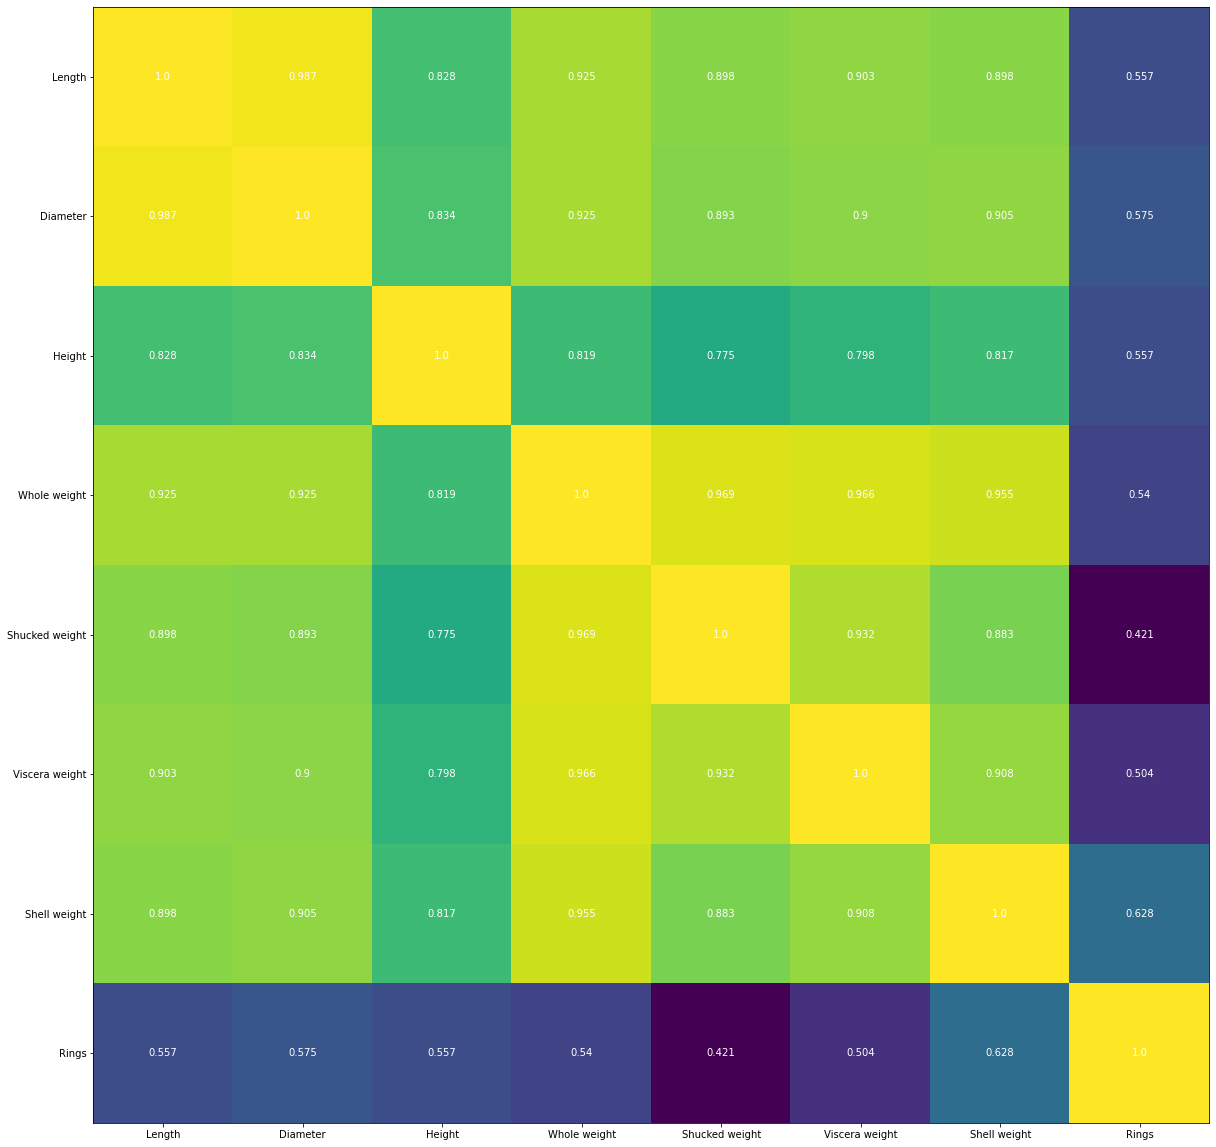

In [5]:
#calculate and round off correlation matrix
corMat = DataFrame(abalone.iloc[:,:8].corr()).values
corMat = np.around(corMat, decimals = 3)

#print correlation with target variable
feature_importance = DataFrame(abalone.iloc[:,:8].corr()).iloc[:-1, -1].sort_values(ascending=False)
print('Features in Descending Order of Importance', list(feature_importance.index))

#visualize correlation matrix
columns = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
fig, ax = plot.subplots(figsize = (20,60))
im = ax.imshow(corMat)

ax.set_xticks(range(len(corMat)))
ax.set_yticks(range(len(corMat)))
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)

for i in range(8):
    for j in range(8):
        text = ax.text(j, i, corMat[i, j],
                       ha="center", va="center", color="w")


In [6]:
# see that the target feature is discrete
print(set(abalone['Rings']))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29}


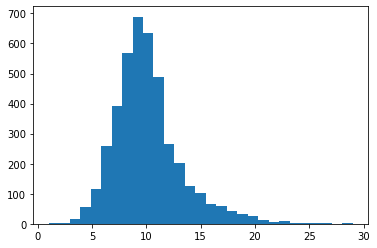

In [7]:
# plotting distribution of target
n, bins, patches = plot.hist(abalone['Rings'], bins = 29)

In [8]:
# Separate the target value
y = abalone["Rings"]
X = abalone.drop(columns = "Rings")

In [9]:
from sklearn.model_selection import train_test_split
# splitting into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 50)

In [10]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

# Initializing classifier and giving hyperparameter k=3
knn = KNeighborsClassifier(n_neighbors=3)
# training classifier
knn.fit(X_train, y_train)
# Evaluate the classifier
print(knn.score(X_test, y_test))

# Try changing hyperparameter
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.2021531100478469
0.22129186602870812


In [11]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# Initializing classifier with one-v-rest approach. random_state is to ensure same results in every execution.
logr = LogisticRegression(multi_class = 'ovr', random_state=3)
# training classifier
logr.fit(X_train, y_train)
# Evaluate the classifier
print(logr.score(X_test, y_test))

0.23086124401913877


In [12]:
# Decision Tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
# Initializing classifier. random_state is to ensure same results in every execution. max_depth is to specify number of splits
dt = DecisionTreeClassifier(random_state=0, max_depth = 3)
# training classifier
dt.fit(X_train, y_train)
# Evaluate the classifier
print(dt.score(X_test, y_test))

0.25478468899521534


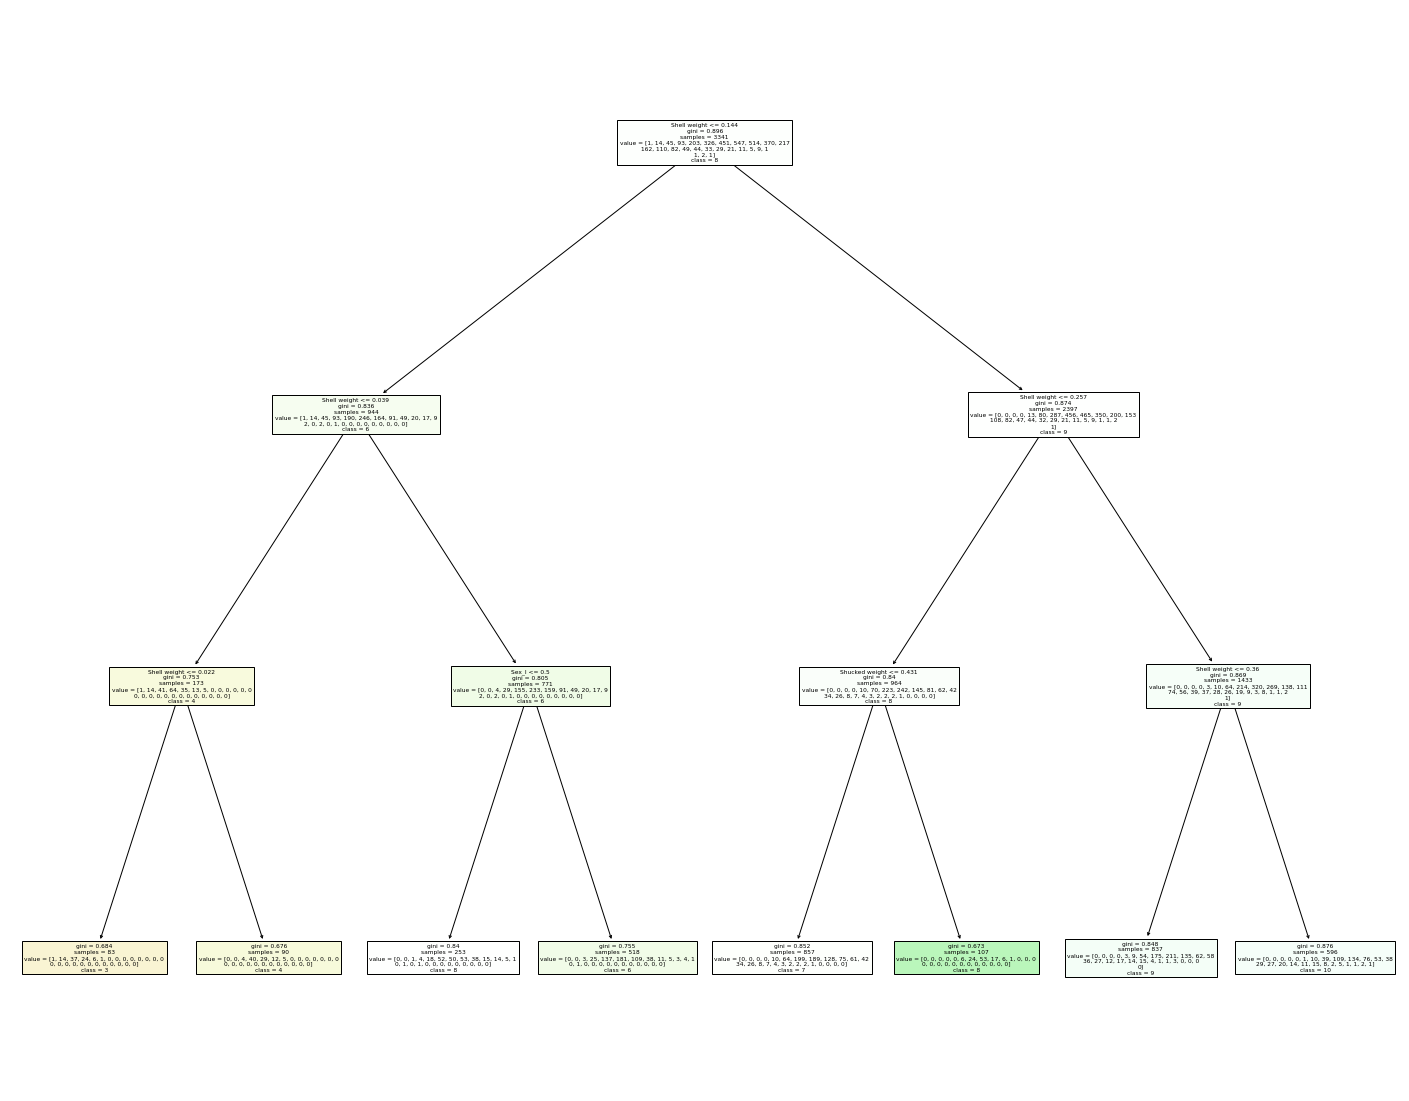

In [15]:
from sklearn import tree

target_names = list(set(abalone["Rings"]))
target_names = [str(target_names[i]) for i in range(len(target_names))]
columns = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Sex_F', 'Sex_I', 
          'Sex_M']
fig = plot.figure(figsize=(25,20))
_ = tree.plot_tree(dt, feature_names = columns, class_names = target_names, filled = True)
fig.savefig("decision_tree.jpeg")